In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing and Classification Score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix


# Metric Printing to graph

from sklearn.metrics import precision_recall_fscore_support as score

# Part1: Preprocessing

In [3]:
selected_cols = ["Barometre","B1003_s1", "B1012_s2", "B1003_s3", "B1003_s3.1", "B1003_s5", "B1003_s5.1", "B1003_s8", "B1406_s5", "B1201_s7", "B1003_s7.1", "B1201_s29", "B1201_s33.1", "B1003_s52", "B1301_s53.1", "B1301_s54.1", "B1510_s47", "B1012_s58", "B1302_s61", "B1201_s54", "B1502_s22", "B1003_s27", "B1205_s4", "B1003_s4", "B2307_s14.0.1", "B2307_s14.1", "B2307_s14.2", "B2307_s14.3", "B2307_s14.4", "B2307_s14.5", "B2307_s14.6", "B2307_s14.7", "B2307_s15", "B2307_s17", "B2307_s18.1", "B2307_s20.3", "B2307_s20.4", "B2307_s21.1", "B2307_s21.2", "B2307_s21.4", "B2307_s26.0.1", "B2307_s26.0.2", "B2307_s26.0.3", "B2307_s26.0.4", "B2307_s26.0.5", "B2307_s26.0.6","B2307_s26.0.7", "B2307_s28.1", "B2307_s28.2", "B2307_s28.3", "B2307_s28.4", "B2307_s28.5", "B2307_s28.6", "B2307_s28.7", "B2307_s28.8"]
konda_23jul = pd.read_csv('konda2023.csv', sep = None, usecols = selected_cols )
konda_23jul = konda_23jul.loc[konda_23jul["Barometre"] == "144"].reset_index()


C:\Users\omen\AppData\Local\Temp\ipykernel_10312\413832661.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  konda_23jul = pd.read_csv('konda2023.csv', sep = None, usecols = selected_cols )


In [4]:
konda_23jul.rename(columns = {"Bölge":"Region","Kırkent":"City_rural","B1003_s1":"Sex", "B1012_s2":"Age", "B1003_s3":"Educ", "B1003_s3.1":"Educ_grouped", "B1003_s5":"Birth_place", "B1003_s5.1":"Birth_placeRegion", "B1003_s8":"Work", "B1406_s5":"Growing_place", "B1201_s7":"Home_pop", "B1003_s7.1":"Home_popGrouped", "B1201_s29":"Life_style", "B1201_s33.1":"Marital", "B1003_s52":"Purdah", "B1301_s53.1":"Ethnicity", "B1301_s54.1":"Religion", "B1510_s47":"Religiosity", "B1012_s58":"Income", "B1302_s61":"Income_PC", "B1201_s54":"Home_econ", "B1502_s22":"RTE_note", "B1003_s27":"Happiness", "B1205_s4":"Mother_educ", "B1003_s4":"Father_educ", "B2307_s14.0.1":"Childhood_fam", "B2307_s14.1":"Childhood_mom", "B2307_s14.2":"Childhood_dad", "B2307_s14.3":"Childhood_sibl", "B2307_s14.4":"Childhood_grandpar", "B2307_s14.5":"Childhood_relatives", "B2307_s14.6":"Childhood_orphanage", "B2307_s14.7":"Childhood_NA", "B2307_s15":"Childhood_happiness", "B2307_s17":"Childhood_age", "B2307_s18.1":"Childhood_work", "B2307_s20.3":"Childhood_love", "B2307_s20.4":"Childhood_apprec", "B2307_s21.1":"Childhood_familyAttitude", "B2307_s21.2":"Childhood_popularity", "B2307_s21.4":"Childhood_familyValue", "B2307_s26.0.1":"Childhood_discNo", "B2307_s26.0.2":"Childhood_discEthni", "B2307_s26.0.3":"Childhood_discRelig", "B2307_s26.0.4":"Childhood_discLang", "B2307_s26.0.5":"Childhood_discEcon", "B2307_s26.0.6":"Childhood_discGender","B2307_s26.0.7":"Childhood_discNA", "B2307_s28.1":"Childhood_viol", "B2307_s28.2":"Childhood_violMom", "B2307_s28.3":"Childhood_violDad", "B2307_s28.4":"Childhood_violSibl", "B2307_s28.5":"Childhood_violTeach", "B2307_s28.6":"Childhood_violRels", "B2307_s28.7":"Childhood_violOther", "B2307_s28.8":"Childhood_violNA"}, inplace = True)


In [5]:
konda_23jul = konda_23jul.apply(pd.to_numeric, errors='coerce').astype('Int64')

In [6]:
konda_23jul.dropna(axis='rows', how='any', inplace=True)
konda_23jul = konda_23jul[~konda_23jul.eq(99).any(axis=1)]
konda_23jul = konda_23jul[~((konda_23jul['Childhood_NA'] == 1) | (konda_23jul['Childhood_violNA'] == 1) | (konda_23jul["Childhood_discNA"] == 1))]
konda_23jul = konda_23jul.drop(['Childhood_NA', 'Childhood_violNA', "Childhood_discNA"], axis=1)
konda_23jul['Age_group'] = pd.qcut(konda_23jul['Age'], [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], labels=False) + 1
konda_23jul['Income_group'] = pd.qcut(konda_23jul['Income'], [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], labels=False) + 1
konda_23jul = konda_23jul.apply(pd.to_numeric, errors='coerce').astype('Int64')

In [7]:
konda_23jul.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1733 entries, 2 to 3314
Data columns (total 55 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   index                     1733 non-null   Int64
 1   Barometre                 1733 non-null   Int64
 2   Sex                       1733 non-null   Int64
 3   Age                       1733 non-null   Int64
 4   Educ                      1733 non-null   Int64
 5   Educ_grouped              1733 non-null   Int64
 6   Birth_place               1733 non-null   Int64
 7   Birth_placeRegion         1733 non-null   Int64
 8   Work                      1733 non-null   Int64
 9   Growing_place             1733 non-null   Int64
 10  Home_pop                  1733 non-null   Int64
 11  Home_popGrouped           1733 non-null   Int64
 12  Life_style                1733 non-null   Int64
 13  Marital                   1733 non-null   Int64
 14  Purdah                    1733 non-null   Int

%matplotlib inline

for i in konda_23jul.columns[:]:
    plt.figure(figsize=(16,9))
    print(sns.countplot(x = i , data = konda_23jul, palette= "Set2" ))
    plt.xticks(rotation=90)
    plt.show()

from scipy.stats import chi2_contingency
for i in konda_23jul:
    contingency_table = pd.crosstab(konda_23jul['Childhood_viol'], konda_23jul[i])
    print(contingency_table)
    chi2, p, _, _ = chi2_contingency(pd.crosstab(konda_23jul['Childhood_viol'], konda_23jul[i]))
    print("p-value:", p)

# Part2  Traditional Variable Selection vs Neural Networks

In [8]:
X = konda_23jul.drop(columns=["index", 'Barometre', 'Childhood_viol', "Age", "Income", "Home_pop", "Birth_place", "Childhood_violMom","Childhood_violDad","Childhood_violSibl", "Childhood_violTeach", "Childhood_violRels", "Childhood_violOther" ]).reset_index(drop=True)
X1 = konda_23jul[["Home_popGrouped", "Life_style", "Purdah", "Ethnicity", "Religion", "Age_group", "Income_group" ]]
X2 = konda_23jul[["Sex", "Educ", "Growing_place", "Ethnicity", "Happiness", "Childhood_discEthni", "Childhood_discRelig", "Childhood_discLang", "Childhood_discEcon", "Childhood_discGender"]]
X3 = konda_23jul[["Sex", "Ethnicity", "Birth_place", "Growing_place", "Childhood_age", "Age_group"]]
X4 = konda_23jul[["Sex", "Ethnicity", "Birth_place", "Growing_place", "Age_group", "Income_group"]]
X5 = konda_23jul[["Sex", "Ethnicity", "Birth_place", "Growing_place", "Mother_educ", "Father_educ", "Educ"]]
X6 = konda_23jul[["Sex", "Ethnicity", "Income_group", "Educ", "Life_style", "Religiosity", "Childhood_work"]]
X7 = konda_23jul[["Sex", "Ethnicity", "Income_group", "Educ", "Life_style", "Religiosity", "Childhood_age"]]
X8 = konda_23jul[["Sex", "Ethnicity", "Birth_placeRegion", "Home_econ", "Growing_place", "Life_style", "Mother_educ","Childhood_age"]]
X9 = konda_23jul[["Sex", "Ethnicity", "Birth_placeRegion", "Home_econ", "Growing_place", "Life_style", "Mother_educ"]]
X10 = konda_23jul[["Childhood_familyValue", "Childhood_popularity", "Childhood_familyAttitude", "Childhood_familyAttitude", "Childhood_apprec", "Childhood_love"]]
X11 = konda_23jul[["Childhood_relatives", "Childhood_grandpar", "Childhood_sibl", "Childhood_dad", "Childhood_mom", "Childhood_love"]]
X12 = konda_23jul[["Growing_place", "Life_style", "Ethnicity", "Mother_educ", "Father_educ", "Childhood_fam"]]
X13 = konda_23jul[["Sex", "Life_style", "Ethnicity", "Mother_educ", "Father_educ"]]


#Assign data from first fifth columns to y variable
y1 = konda_23jul["Childhood_viol"].ravel()

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size = 0.3, random_state=1, stratify=y1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.3, random_state=1, stratify=y1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y1, test_size = 0.3, random_state=1, stratify=y1)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y1, test_size = 0.3, random_state=1, stratify=y1)
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y1, test_size = 0.3, random_state=1, stratify=y1)
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y1, test_size = 0.3, random_state=1, stratify=y1)
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y1, test_size = 0.3, random_state=1, stratify=y1)
X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y1, test_size = 0.3, random_state=1, stratify=y1)
X8_train, X8_test, y8_train, y8_test = train_test_split(X8, y1, test_size = 0.3, random_state=1, stratify=y1)
X9_train, X9_test, y9_train, y9_test = train_test_split(X9, y1, test_size = 0.3, random_state=1, stratify=y1)
X10_train, X10_test, y10_train, y10_test = train_test_split(X10, y1, test_size = 0.3, random_state=1)
X11_train, X11_test, y11_train, y11_test = train_test_split(X11, y1, test_size = 0.3, random_state=1)
X12_train, X12_test, y12_train, y12_test = train_test_split(X12, y1, test_size = 0.3, random_state=1)
X13_train, X13_test, y13_train, y13_test = train_test_split(X13, y1, test_size = 0.3, random_state=1)

## Scaler Fit Discarded From All, Parameters changed

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler1 = StandardScaler()
scaler2 = StandardScaler()
scaler3 = StandardScaler()
scaler4 = StandardScaler()
scaler5 = StandardScaler()
scaler6 = StandardScaler()
scaler7 = StandardScaler()
scaler8 = StandardScaler()
scaler9 = StandardScaler()
scaler10 = StandardScaler()
scaler11 = StandardScaler()
scaler12 = StandardScaler()
scaler13 = StandardScaler()

scaler.fit(X_train)
scaler1.fit(X1_train)
scaler2.fit(X2_train)
scaler3.fit(X3_train)
scaler4.fit(X4_train)
scaler5.fit(X5_train)
scaler6.fit(X6_train)
scaler7.fit(X7_train)
scaler8.fit(X8_train)
scaler9.fit(X9_train)
scaler10.fit(X10_train)
scaler11.fit(X11_train)
scaler12.fit(X12_train)
scaler13.fit(X13_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X1_train = scaler1.transform(X1_train)
X1_test = scaler1.transform(X1_test)

X2_train = scaler2.transform(X2_train)
X2_test = scaler2.transform(X2_test)

X3_train = scaler3.transform(X3_train)
X3_test = scaler3.transform(X3_test)

X4_train = scaler4.transform(X4_train)
X4_test = scaler4.transform(X4_test)

X5_train = scaler5.transform(X5_train)
X5_test = scaler5.transform(X5_test)

X6_train = scaler6.transform(X6_train)
X6_test = scaler6.transform(X6_test)

X7_train = scaler7.transform(X7_train)
X7_test = scaler7.transform(X7_test)

X8_train = scaler8.transform(X8_train)
X8_test = scaler8.transform(X8_test)

X9_train = scaler9.transform(X9_train)
X9_test = scaler9.transform(X9_test)

X10_train = scaler10.transform(X10_train)
X10_test = scaler10.transform(X10_test)

X11_train = scaler11.transform(X11_train)
X11_test = scaler11.transform(X11_test)

X12_train = scaler12.transform(X12_train)
X12_test = scaler12.transform(X12_test)

X13_train = scaler13.transform(X13_train)
X13_test = scaler13.transform(X13_test)

In [36]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=5000, activation="relu",  random_state=1)
mlp1 = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=5000, activation="relu",  random_state=1)
mlp2 = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=5000, activation="relu",  random_state=1)
mlp3 = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=5000, activation="relu",  random_state=1)
mlp4 = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=5000, activation="relu",  random_state= 1)
mlp5 = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=5000, activation="relu",  random_state=1)
mlp6 = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=5000, activation="relu",  random_state=1)
mlp7 = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=5000, activation="relu",  random_state=1)
mlp8 = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=5000, activation="relu",  random_state=1)
mlp9 = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=5000, activation="relu",  random_state=1)
mlp10 = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=5000, activation="relu", random_state=1)
mlp11 = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=5000, activation="relu", random_state=1)
mlp12 = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=5000, activation="relu", random_state=1)
mlp13 = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=5000, activation="relu", random_state=1)


# default activation fnc. is relu (rectified linear unit)
#Comments on alternatives: ‘identity:Best for base X Precision, 0 guess for others, ‘logistic:The worst’, ‘tanh:Best overall’, ‘relu:Good, similar to tanh but worse’

mlp.fit(X_train, y_train)
mlp1.fit(X1_train, y1_train)
mlp2.fit(X2_train, y2_train)
mlp3.fit(X3_train, y3_train)
mlp4.fit(X4_train, y4_train)
mlp5.fit(X5_train, y5_train)
mlp6.fit(X6_train, y6_train)
mlp7.fit(X7_train, y7_train)
mlp8.fit(X8_train, y8_train)
mlp9.fit(X9_train, y9_train)
mlp10.fit(X10_train, y10_train)
mlp11.fit(X11_train, y11_train)
mlp12.fit(X12_train, y12_train)
mlp13.fit(X13_train, y13_train)

MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=5000, random_state=1)

In [37]:
predictions = mlp.predict(X_test)
predictions1 = mlp1.predict(X1_test)
predictions2 = mlp2.predict(X2_test)
predictions3 = mlp3.predict(X3_test)
predictions4 = mlp4.predict(X4_test)
predictions5 = mlp5.predict(X5_test)
predictions6 = mlp6.predict(X6_test)
predictions7 = mlp7.predict(X7_test)
predictions8 = mlp8.predict(X8_test)
predictions9 = mlp9.predict(X9_test)
predictions10 = mlp10.predict(X10_test)
predictions11 = mlp11.predict(X11_test)
predictions12 = mlp12.predict(X12_test)
predictions13 = mlp13.predict(X13_test)


X               precision    recall  f1-score   support

         1.0       0.75      0.77      0.76       363
         2.0       0.43      0.40      0.42       157

    accuracy                           0.66       520
   macro avg       0.59      0.59      0.59       520
weighted avg       0.65      0.66      0.66       520

X1               precision    recall  f1-score   support

         1.0       0.71      0.82      0.76       363
         2.0       0.34      0.22      0.26       157

    accuracy                           0.63       520
   macro avg       0.52      0.52      0.51       520
weighted avg       0.59      0.63      0.61       520

X2               precision    recall  f1-score   support

         1.0       0.71      0.83      0.77       363
         2.0       0.37      0.24      0.29       157

    accuracy                           0.65       520
   macro avg       0.54      0.53      0.53       520
weighted avg       0.61      0.65      0.62       520

X3         

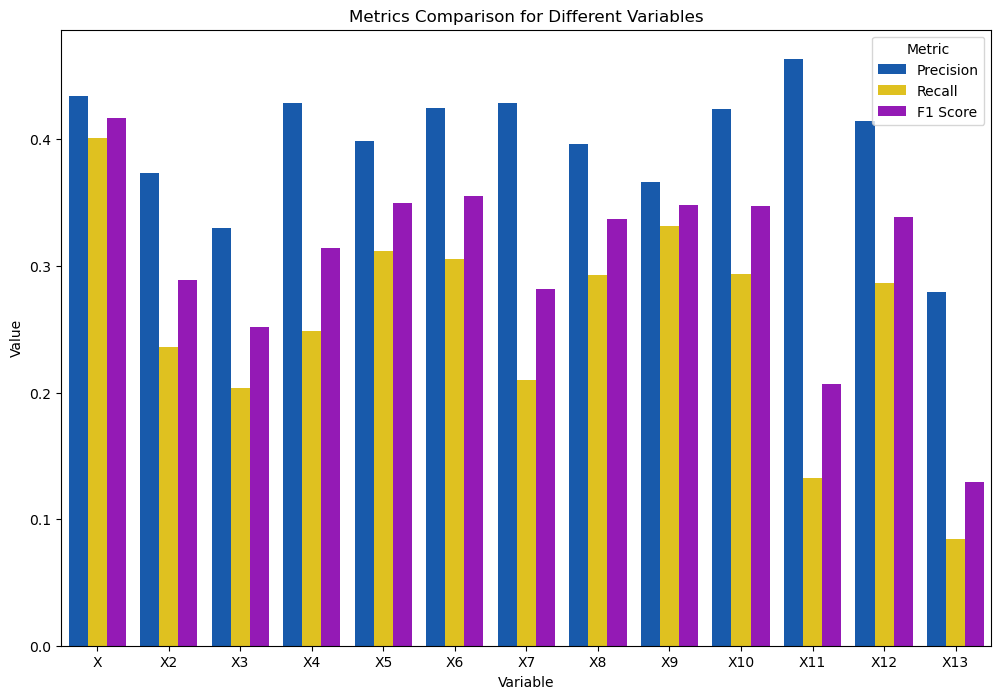

In [38]:
from sklearn.metrics import classification_report, confusion_matrix


print("X", classification_report(y_test,predictions))
print("X1", classification_report(y1_test,predictions1))
print("X2", classification_report(y2_test,predictions2))
print("X3", classification_report(y3_test,predictions3))
print("X4", classification_report(y4_test,predictions4))
print("X5", classification_report(y5_test,predictions5))
print("X6", classification_report(y6_test,predictions6))
print("X7", classification_report(y7_test,predictions7))
print("X8", classification_report(y8_test,predictions8))
print("X9", classification_report(y9_test,predictions9))
print("X10", classification_report(y10_test,predictions10))
print("X11", classification_report(y11_test,predictions11))
print("X12", classification_report(y12_test,predictions12))
print("X13", classification_report(y13_test,predictions13))


precision_X,recall_X,fscore_X,_ =score(y1_test,predictions,average='micro', labels=[2])
metrics_dataX = {
    'Variable': ['X'],
    'Precision': precision_X,
    'Recall': recall_X,
    'F1 Score': fscore_X
}
metrics_df_X = pd.DataFrame(metrics_dataX)



precision_X1,recall_X1,fscore_X1,_ =score(y1_test,predictions1,average='micro', labels=[2])
metrics_dataX1 = {
    'Variable': ['X1'],
    'Precision': precision_X1,
    'Recall': recall_X1,
    'F1 Score': fscore_X1
}
metrics_df_X1 = pd.DataFrame(metrics_dataX)



precision_X2,recall_X2,fscore_X2,_ =score(y2_test,predictions2,average='micro', labels=[2])
metrics_dataX2 = {
    'Variable': ['X2'],
    'Precision': precision_X2,
    'Recall': recall_X2,
    'F1 Score': fscore_X2}
metrics_df_X2 = pd.DataFrame(metrics_dataX2)



precision_X3,recall_X3,fscore_X3,_ =score(y3_test,predictions3,average='micro', labels=[2])
metrics_dataX3 = {
    'Variable': ['X3'],
    'Precision': precision_X3,
    'Recall': recall_X3,
    'F1 Score': fscore_X3
}
metrics_df_X3 = pd.DataFrame(metrics_dataX3)



precision_X4,recall_X4,fscore_X4,_ =score(y4_test,predictions4,average='micro', labels=[2])
metrics_dataX4 = {
    'Variable': ['X4'],
    'Precision': precision_X4,
    'Recall': recall_X4,
    'F1 Score': fscore_X4
}
metrics_df_X4 = pd.DataFrame(metrics_dataX4)



precision_X5,recall_X5,fscore_X5,_ =score(y5_test,predictions5, average='micro', labels=[2])
metrics_dataX5 = {
    'Variable': ['X5'],
    'Precision': precision_X5,
    'Recall': recall_X5,
    'F1 Score': fscore_X5
}
metrics_df_X5 = pd.DataFrame(metrics_dataX5)



precision_X6, recall_X6, fscore_X6,_ = score(y6_test, predictions6, average='micro', labels=[2])
metrics_dataX6 = {
    'Variable': ['X6'],
    'Precision': precision_X6,
    'Recall': recall_X6,
    'F1 Score': fscore_X6
}
metrics_df_X6 = pd.DataFrame(metrics_dataX6)


precision_X7, recall_X7, fscore_X7, _ = score(y7_test, predictions7, average='micro', labels=[2])
metrics_dataX7 = {
    'Variable': ['X7'],
    'Precision': precision_X7,
    'Recall': recall_X7,
    'F1 Score': fscore_X7
}
metrics_df_X7 = pd.DataFrame(metrics_dataX7)

precision_X8, recall_X8, fscore_X8, _ = score(y8_test, predictions8, average='micro', labels=[2])
metrics_dataX8 = {
    'Variable': ['X8'],
    'Precision': precision_X8,
    'Recall': recall_X8,
    'F1 Score': fscore_X8
}
metrics_df_X8 = pd.DataFrame(metrics_dataX8)


precision_X9, recall_X9, fscore_X9, _ = score(y9_test, predictions9, average='micro', labels=[2])
metrics_dataX9 = {
    'Variable': ['X9'],
    'Precision': precision_X9,
    'Recall': recall_X9,
    'F1 Score': fscore_X9
}
metrics_df_X9 = pd.DataFrame(metrics_dataX9)



precision_X10, recall_X10, fscore_X10, _ = score(y10_test, predictions10, average='micro', labels=[2])
metrics_dataX10 = {
    'Variable': ['X10'],
    'Precision': precision_X10,
    'Recall': recall_X10,
    'F1 Score': fscore_X10
}
metrics_df_X10 = pd.DataFrame(metrics_dataX10)



precision_X11, recall_X11, fscore_X11, _ = score(y11_test, predictions11, average='micro', labels=[2])
metrics_dataX11 = {
    'Variable': ['X11'],
    'Precision': precision_X11,
    'Recall': recall_X11,
    'F1 Score': fscore_X11
}
metrics_df_X11 = pd.DataFrame(metrics_dataX11)


precision_X12, recall_X12, fscore_X12, _ = score(y12_test, predictions12, average='micro', labels=[2])
metrics_dataX12 = {
    'Variable': ['X12'],
    'Precision': precision_X12,
    'Recall': recall_X12,
    'F1 Score': fscore_X12
}
metrics_df_X12 = pd.DataFrame(metrics_dataX12)


precision_X13, recall_X13, fscore_X13, _ = score(y13_test, predictions13, average='micro', labels=[2])
metrics_dataX13 = {
    'Variable': ['X13'],
    'Precision': precision_X13,
    'Recall': recall_X13,
    'F1 Score': fscore_X13
}
metrics_df_X13 = pd.DataFrame(metrics_dataX13)


all_metrics_df = pd.concat([metrics_df_X, metrics_df_X1, metrics_df_X2, metrics_df_X3, metrics_df_X4, metrics_df_X5, metrics_df_X6, metrics_df_X7, metrics_df_X8,metrics_df_X9, metrics_df_X10, metrics_df_X11, metrics_df_X12, metrics_df_X13 ], ignore_index=True)

melted_metrics_df = pd.melt(all_metrics_df, id_vars=['Variable'], var_name='Metric', value_name='Value')

plt.figure(figsize=(12, 8))
sns.barplot(x='Variable', y='Value', hue='Metric', data=melted_metrics_df, palette='prism')
plt.title('Metrics Comparison for Different Variables')
plt.show()




X1 = "Home_popGrouped", "Life_style", "Purdah", "Ethnicity", "Religion", "Age_group", "Income_group" 

X2 = "Sex", "Educ", "Growing_place", "Ethnicity", "Happiness", "Childhood_discEthni", "Childhood_discRelig", "Childhood_discLang", "Childhood_discEcon", "Childhood_discGender"

X3 = "Sex", "Ethnicity", "Birth_place", "Growing_place", "Childhood_age", "Age_group"

X4 = "Sex", "Ethnicity", "Birth_place", "Growing_place", "Age_group", "Income_group"

**X5 = "Sex", "Ethnicity", "Birth_place", "Growing_place", "Mother_educ", "Father_educ", "Educ"**

**X6 = "Sex", "Ethnicity", "Income_group", "Educ", "Life_style", "Religiosity", "Childhood_work"**

X7 = "Sex", "Ethnicity", "Income_group", "Educ", "Life_style", "Religiosity", "Childhood_age"

X8 = "Sex", "Ethnicity", "Birth_placeRegion", "Home_econ", "Growing_place", "Life_style", "Mother_educ","Childhood_age"

X9 = "Sex", "Ethnicity", "Birth_placeRegion", "Home_econ", "Growing_place", "Life_style", "Mother_educ"

**X10 = "Childhood_familyValue", "Childhood_popularity", "Childhood_familyAttitude", "Childhood_familyAttitude", "Childhood_apprec", "Childhood_love"**

X11 = "Childhood_relatives", "Childhood_grandpar", "Childhood_sibl", "Childhood_dad", "Childhood_mom", "Childhood_love"

X12 = "Growing_place", "Life_style", "Ethnicity", "Mother_educ", "Father_educ", "Childhood_fam"

X13 = "Sex", "Life_style", "Ethnicity", "Mother_educ", "Father_educ"



## Part3: Optimization by Balancing and Model Comparison

In [15]:
# Resampling Repository
# https://imbalanced-learn.org/stable/over_sampling.html
# pip install -U imbalanced-learn

# Oversampling is used after doing train-test splits.
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)

#Note that all training and random sampling used with the same random state for comparison.



In [16]:
# ML Algorithms used for comparison

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier

#Preprocessing and Classification Score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix


# Metric Printing to graph

from sklearn.metrics import precision_recall_fscore_support as score



In [17]:
# Multi Layer Perceptron



X_MLP_train, X_MLP_test, y_MLP_train, y_MLP_test = train_test_split(X, y1, test_size = 0.5, random_state=1, stratify=y1)


X_MLP_train, y_MLP_train = ros.fit_resample(X_MLP_train, y_MLP_train)


scaler_MLP = StandardScaler(with_mean=False, with_std=False)
scaler_MLP.fit(X_MLP_train)

X_MLP_train = scaler_MLP.transform(X_MLP_train)
X_MLP_test = scaler_MLP.transform(X_MLP_test)


mlp_resampled = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=3500, random_state=1, activation="relu", solver="adam")
mlp_resampled.fit(X_MLP_train, y_MLP_train)
predictions_MLP = mlp_resampled.predict(X_MLP_test)


print("X", classification_report(y_MLP_test,predictions_MLP))

precision_MLP,recall_MLP,fscore_MLP,_ =score(y_MLP_test,predictions_MLP,average='micro', labels=[2])

metrics_MLP = {
    'Variable': ['MLP'],
    'Precision': precision_MLP,
    'Recall': recall_MLP,
    'F1 Score': fscore_MLP
}
metrics_MLP = pd.DataFrame(metrics_MLP)





X               precision    recall  f1-score   support

         1.0       0.68      0.08      0.14       605
         2.0       0.30      0.92      0.45       262

    accuracy                           0.33       867
   macro avg       0.49      0.50      0.30       867
weighted avg       0.57      0.33      0.23       867



In [18]:
# Logistic Regression


X_logreg_train, X_logreg_test, y_logreg_train, y_logreg_test = train_test_split(X, y1, test_size = 0.5, random_state=1, stratify=y1)

X_logreg_train, y_logreg_train = ros.fit_resample(X_logreg_train, y_logreg_train)

scaler_logreg = StandardScaler(with_mean=False, with_std=False)
scaler_logreg.fit(X_logreg_train)

X_logreg_train = scaler_logreg.transform(X_logreg_train)
X_logreg_test = scaler_logreg.transform(X_logreg_test)

clf_logreg = LogisticRegression(solver="newton-cg", max_iter=15000, random_state=1, multi_class = "multinomial", class_weight= "balanced")
clf_logreg.fit(X_logreg_train, y_logreg_train)
predictions_logreg = clf_logreg.predict(X_logreg_test)


print("Logistic Regression", classification_report(y_logreg_test,predictions_logreg))

precision_logreg,recall_logreg,fscore_logreg,_ =score(y_logreg_test,predictions_logreg,average='micro', labels=[2])
metrics_LogReg = {
    'Variable': ['LogReg'],
    'Precision': precision_logreg,
    'Recall': recall_logreg,
    'F1 Score': fscore_logreg
}
metrics_LogReg = pd.DataFrame(metrics_LogReg)



C:\Users\omen\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\omen\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


Logistic Regression               precision    recall  f1-score   support

         1.0       0.82      0.66      0.73       605
         2.0       0.46      0.68      0.55       262

    accuracy                           0.66       867
   macro avg       0.64      0.67      0.64       867
weighted avg       0.71      0.66      0.68       867



In [19]:

# K_Nearest Neighbors Classifier ###


X_KNN_train, X_KNN_test, y_KNN_train, y_KNN_test = train_test_split(X, y1, test_size=0.5, random_state=1, stratify=y1)

X_KNN_train, y_KNN_train = ros.fit_resample(X_KNN_train, y_KNN_train)


scaler_KNN = StandardScaler()
scaler_KNN.fit(X_KNN_train)

X_KNN_train = scaler_KNN.transform(X_KNN_train)
X_KNN_test = scaler_KNN.transform(X_KNN_test)




clf_KNN=KNeighborsClassifier(n_neighbors=2, algorithm="ball_tree", leaf_size=40)
clf_KNN.fit(X_KNN_train,y_KNN_train)
predictions_KNN=clf_KNN.predict(X_KNN_test)

print("K Nearest Neighbors", classification_report(y_KNN_test,predictions_KNN))

precision_KNN,recall_KNN,fscore_KNN,_ =score(y_KNN_test,predictions_KNN,average='micro', labels=[2])
metrics_KNN = {
    'Variable': ['KNN'],
    'Precision': precision_KNN,
    'Recall': recall_KNN,
    'F1 Score': fscore_KNN
}
metrics_KNN = pd.DataFrame(metrics_KNN)






K Nearest Neighbors               precision    recall  f1-score   support

         1.0       0.73      0.81      0.77       605
         2.0       0.41      0.30      0.35       262

    accuracy                           0.66       867
   macro avg       0.57      0.56      0.56       867
weighted avg       0.63      0.66      0.64       867



In [20]:
# Stochastic Gradient Descent Classifier

X_SGD_train, X_SGD_test, y_SGD_train, y_SGD_test = train_test_split(X, y1, test_size=0.5, random_state=1, stratify=y1)

X_SGD_train, y_SGD_train = ros.fit_resample(X_SGD_train, y_SGD_train)

scaler_SGD = StandardScaler(with_mean=False, with_std=False)
scaler_SGD.fit(X_SGD_train)

X_SGD_train = scaler_SGD.transform(X_SGD_train)
X_SGD_test = scaler_SGD.transform(X_SGD_test)


clf_SGD = SGDClassifier(loss="modified_huber", max_iter=4000, learning_rate="optimal", alpha=0.01, random_state=1)
clf_SGD.fit(X_SGD_train, y_SGD_train)
predictions_SGD = clf_SGD.predict(X_SGD_test)

print("Stochastic Gradient Classifier", classification_report(y_SGD_test,predictions_SGD))

precision_SGD,recall_SGD,fscore_SGD,_ =score(y_SGD_test,predictions_SGD,average='micro', labels=[2])
metrics_SGD = {
    'Variable': ['SGD'],
    'Precision': precision_SGD,
    'Recall': recall_SGD,
    'F1 Score': fscore_SGD
}
metrics_SGD = pd.DataFrame(metrics_SGD)





Stochastic Gradient Classifier               precision    recall  f1-score   support

         1.0       1.00      0.00      0.00       605
         2.0       0.30      1.00      0.46       262

    accuracy                           0.30       867
   macro avg       0.65      0.50      0.23       867
weighted avg       0.79      0.30      0.14       867



In [21]:
# Random Forest

X_RForest_train, X_RForest_test, y_RForest_train, y_RForest_test = train_test_split(X, y1, test_size=0.5, random_state=1, stratify=y1)

X_RForest_train, y_RForest_train = ros.fit_resample(X_RForest_train, y_RForest_train)


clf_RForest = RandomForestClassifier(n_estimators=4000, max_depth=19, random_state = 1)
clf_RForest.fit(X_RForest_train, y_RForest_train)
predictions_RForest = clf_RForest.predict(X_RForest_test)

print("Random Forest Classifier", classification_report(y_RForest_test,predictions_RForest))

precision_RForest,recall_RForest,fscore_RForest,_ =score(y_RForest_test,predictions_RForest,average='micro', labels=[2])
metrics_RForest = {
    'Variable': ['RForest'],
    'Precision': precision_RForest,
    'Recall': recall_RForest,
    'F1 Score': fscore_RForest
}
metrics_RForest = pd.DataFrame(metrics_RForest)




Random Forest Classifier               precision    recall  f1-score   support

         1.0       0.76      0.86      0.81       605
         2.0       0.54      0.38      0.44       262

    accuracy                           0.72       867
   macro avg       0.65      0.62      0.63       867
weighted avg       0.69      0.72      0.70       867



In [22]:
# Decision Tree #####

X_DTree_train, X_DTree_test, y_DTree_train, y_DTree_test = train_test_split(X, y1, test_size=0.5, random_state=1, stratify=y1)

X_DTree_train, y_DTree_train = ros.fit_resample(X_DTree_train, y_DTree_train)

clf_DTree = DecisionTreeClassifier(max_features=10, max_depth=None, class_weight ="balanced", min_samples_split=4, random_state =1)
clf_DTree.fit(X_DTree_train, y_DTree_train)
predictions_Dtree = clf_DTree.predict(X_DTree_test)

print("Decision Tree", classification_report(y_DTree_test,predictions_Dtree))

precision_Dtree,recall_Dtree,fscore_Dtree,_ =score(y_DTree_test,predictions_Dtree,average='micro', labels=[2])
metrics_DTree = {
    'Variable': ['DTree'],
    'Precision': precision_Dtree,
    'Recall': recall_Dtree,
    'F1 Score': fscore_Dtree
}
metrics_DTree = pd.DataFrame(metrics_DTree)





Decision Tree               precision    recall  f1-score   support

         1.0       0.74      0.72      0.73       605
         2.0       0.39      0.42      0.41       262

    accuracy                           0.63       867
   macro avg       0.57      0.57      0.57       867
weighted avg       0.64      0.63      0.63       867



In [23]:
# Support Vector Machines

X_SVM_train, X_SVM_test, y_SVM_train, y_SVM_test = train_test_split(X, y1, test_size=0.5, random_state=1, stratify=y1)

X_SVM_train, y_SVM_train = ros.fit_resample(X_SVM_train, y_SVM_train)

scaler_SVM = StandardScaler()
scaler_SVM.fit(X_SVM_train)

X_SVM_train = scaler_SVM.transform(X_SVM_train)
X_SVM_test = scaler_SVM.transform(X_SVM_test)


clf_SVM = svm.SVC(gamma='scale', kernel='poly', class_weight= "balanced", random_state =1) 
clf_SVM.fit(X_SVM_train, y_SVM_train)
predictions_SVM = clf_SVM.predict(X_SVM_test)

print("Support Vector Machines", classification_report(y_SVM_test,predictions_SVM))

precision_SVM,recall_SVM,fscore_SVM,_ = score(y_SVM_test,predictions_SVM,average='micro', labels=[2])
metrics_SVM = {
    'Variable': ['SVM'],
    'Precision': precision_SVM,
    'Recall': recall_SVM,
    'F1 Score': fscore_SVM
}
metrics_SVM = pd.DataFrame(metrics_SVM)







Support Vector Machines               precision    recall  f1-score   support

         1.0       0.74      0.87      0.80       605
         2.0       0.51      0.31      0.38       262

    accuracy                           0.70       867
   macro avg       0.63      0.59      0.59       867
weighted avg       0.67      0.70      0.68       867



In [24]:
# Multinomial Naive Bayes

X_MNB_train, X_MNB_test, y_MNB_train, y_MNB_test = train_test_split(X, y1, test_size=0.5, random_state=1, stratify=y1)

X_MNB_train, y_MNB_train = ros.fit_resample(X_MNB_train, y_MNB_train)

clf_MNB = MultinomialNB(alpha = 0.1, fit_prior = False)
clf_MNB.fit(X_MNB_train, y_MNB_train)
predictions_MNB = clf_MNB.predict(X_MNB_test)

print("Categorical Naive Bayes", classification_report(y_MNB_test,predictions_MNB))


precision_MNB,recall_MNB,fscore_MNB,_ = score(y_MNB_test,predictions_MNB,average='micro', labels=[2])

metrics_MNB = {
    'Variable': ['MNBayes'],
    'Precision': precision_MNB,
    'Recall': recall_MNB,
    'F1 Score': fscore_MNB
}
metrics_MNB = pd.DataFrame(metrics_MNB)






Categorical Naive Bayes               precision    recall  f1-score   support

         1.0       0.70      0.76      0.73       605
         2.0       0.32      0.27      0.29       262

    accuracy                           0.61       867
   macro avg       0.51      0.51      0.51       867
weighted avg       0.59      0.61      0.60       867



In [25]:
# Gradient Boosting Classifier

X_GBC_train, X_GBC_test, y_GBC_train, y_GBC_test = train_test_split(X, y1, test_size=0.5, random_state=1, stratify=y1)

X_GBC_train, y_GBC_train = ros.fit_resample(X_GBC_train, y_GBC_train)


scaler_GBC = StandardScaler(with_mean=False, with_std=False)
scaler_GBC.fit(X_GBC_train)

X_GBC_train = scaler_GBC.transform(X_GBC_train)
X_GBC_test = scaler_GBC.transform(X_GBC_test)


clf_GBC = GradientBoostingClassifier(max_depth=14, loss="exponential", n_estimators=2000, learning_rate=0.07, random_state =1)
clf_GBC.fit(X_GBC_train, y_GBC_train)
predictions_GBC = clf_GBC.predict(X_GBC_test)

print("Gradient Boosting Classifier", classification_report(y_GBC_test,predictions_GBC))

precision_GBC,recall_GBC,fscore_GBC,_ = score(y_GBC_test,predictions_GBC,average='micro', labels=[2])
metrics_GBC = {
    'Variable': ['GBC'],
    'Precision': precision_GBC,
    'Recall': recall_GBC,
    'F1 Score': fscore_GBC
}
metrics_GBC = pd.DataFrame(metrics_GBC)





Gradient Boosting Classifier               precision    recall  f1-score   support

         1.0       0.75      0.74      0.75       605
         2.0       0.42      0.45      0.43       262

    accuracy                           0.65       867
   macro avg       0.59      0.59      0.59       867
weighted avg       0.65      0.65      0.65       867



In [26]:
# Adaboost Classifier

X_Ada_train, X_Ada_test, y_Ada_train, y_Ada_test = train_test_split(X, y1, test_size=0.5, random_state=1, stratify=y1)

X_Ada_train, y_Ada_train = ros.fit_resample(X_Ada_train, y_Ada_train)

scaler_Ada = StandardScaler(with_mean=False, with_std=False)
scaler_Ada.fit(X_Ada_train)

X_Ada_train = scaler_Ada.transform(X_Ada_train)
X_Ada_test = scaler_Ada.transform(X_Ada_test)

clf_Ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state =1)
clf_Ada.fit(X_Ada_train, y_Ada_train)
predictions_Ada = clf_Ada.predict(X_Ada_test)

print("Adaboost Classifier", classification_report(y_Ada_test,predictions_Ada))

precision_Ada,recall_Ada,fscore_Ada,_ = score(y_Ada_test,predictions_Ada,average='micro', labels=[2])
metrics_Ada = {
    'Variable': ['AdaBst'],
    'Precision': precision_Ada,
    'Recall': recall_Ada,
    'F1 Score': fscore_Ada
}
metrics_Ada = pd.DataFrame(metrics_Ada)




Adaboost Classifier               precision    recall  f1-score   support

         1.0       0.81      0.66      0.73       605
         2.0       0.45      0.65      0.53       262

    accuracy                           0.66       867
   macro avg       0.63      0.65      0.63       867
weighted avg       0.70      0.66      0.67       867



In [27]:
# Extremely Randomized Trees

X_ETrees_train, X_ETrees_test, y_ETrees_train, y_ETrees_test = train_test_split(X, y1, test_size=0.5, random_state=1, stratify=y1)

X_ETrees_train, y_ETrees_train = ros.fit_resample(X_ETrees_train, y_ETrees_train)



clf_ETrees = ExtraTreesClassifier(n_estimators=100, criterion="entropy", random_state =1)
clf_ETrees.fit(X_ETrees_train, y_ETrees_train)
predictions_ETrees = clf_ETrees.predict(X_ETrees_test)


print("Extremely Randomized Trees", classification_report(y_ETrees_test,predictions_ETrees))

precision_ETrees,recall_ETrees,fscore_ETrees,_ = score(y_ETrees_test,predictions_ETrees,average='micro', labels=[2])
metrics_ETrees = {
    'Variable': ['ETrees'],
    'Precision': precision_ETrees,
    'Recall': recall_ETrees,
    'F1 Score': fscore_ETrees
}
metrics_ETrees = pd.DataFrame(metrics_ETrees)



Extremely Randomized Trees               precision    recall  f1-score   support

         1.0       0.75      0.92      0.82       605
         2.0       0.60      0.28      0.38       262

    accuracy                           0.73       867
   macro avg       0.67      0.60      0.60       867
weighted avg       0.70      0.73      0.69       867



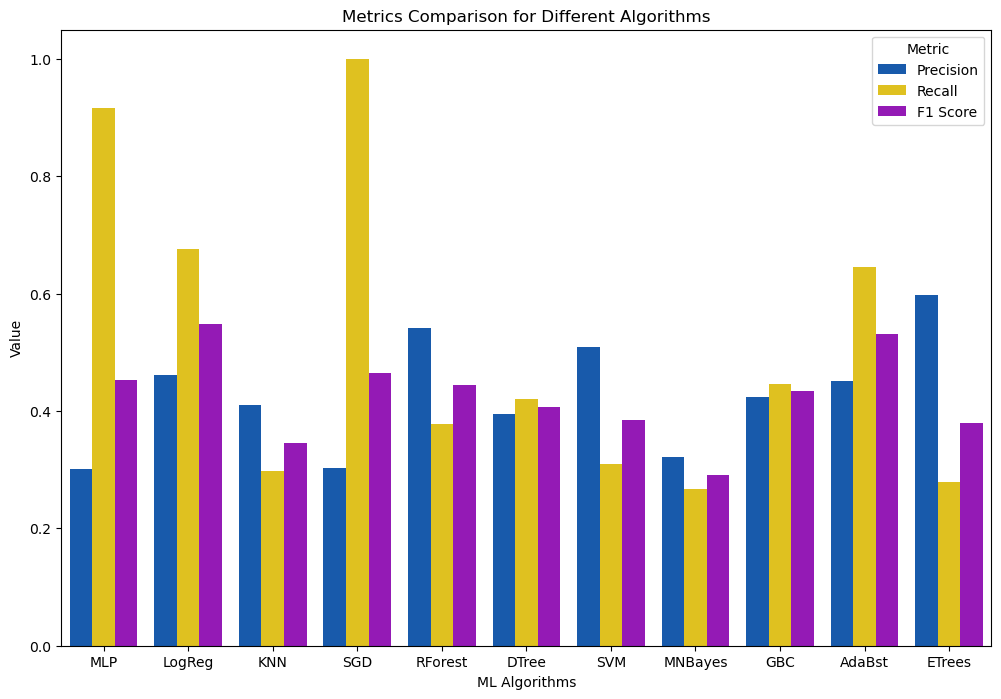

In [28]:
all_metrics_ML = pd.concat([metrics_MLP, metrics_LogReg, metrics_KNN, metrics_SGD, metrics_RForest, metrics_DTree, 
                            metrics_SVM, metrics_MNB, metrics_GBC,metrics_Ada, metrics_ETrees], ignore_index=True)

melted_metrics_ML = pd.melt(all_metrics_ML, id_vars=['Variable'], var_name='Metric', value_name='Value')

plt.figure(figsize=(12, 8))
sns.barplot(x='Variable', y='Value', hue='Metric', data=melted_metrics_ML, palette='prism')
plt.title('Metrics Comparison for Different Algorithms')
plt.xlabel("ML Algorithms")
plt.show()

## Part4 - Hyperparameter Comparison

In [29]:
X_train_CV, X_test_CV, y_train_CV, y_test_CV = train_test_split(X, y1, test_size = 0.5, random_state=1, stratify=y1)
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from sklearn.pipeline import Pipeline

C:\Users\omen\AppData\Local\Temp\ipykernel_10312\3885846421.py:158: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


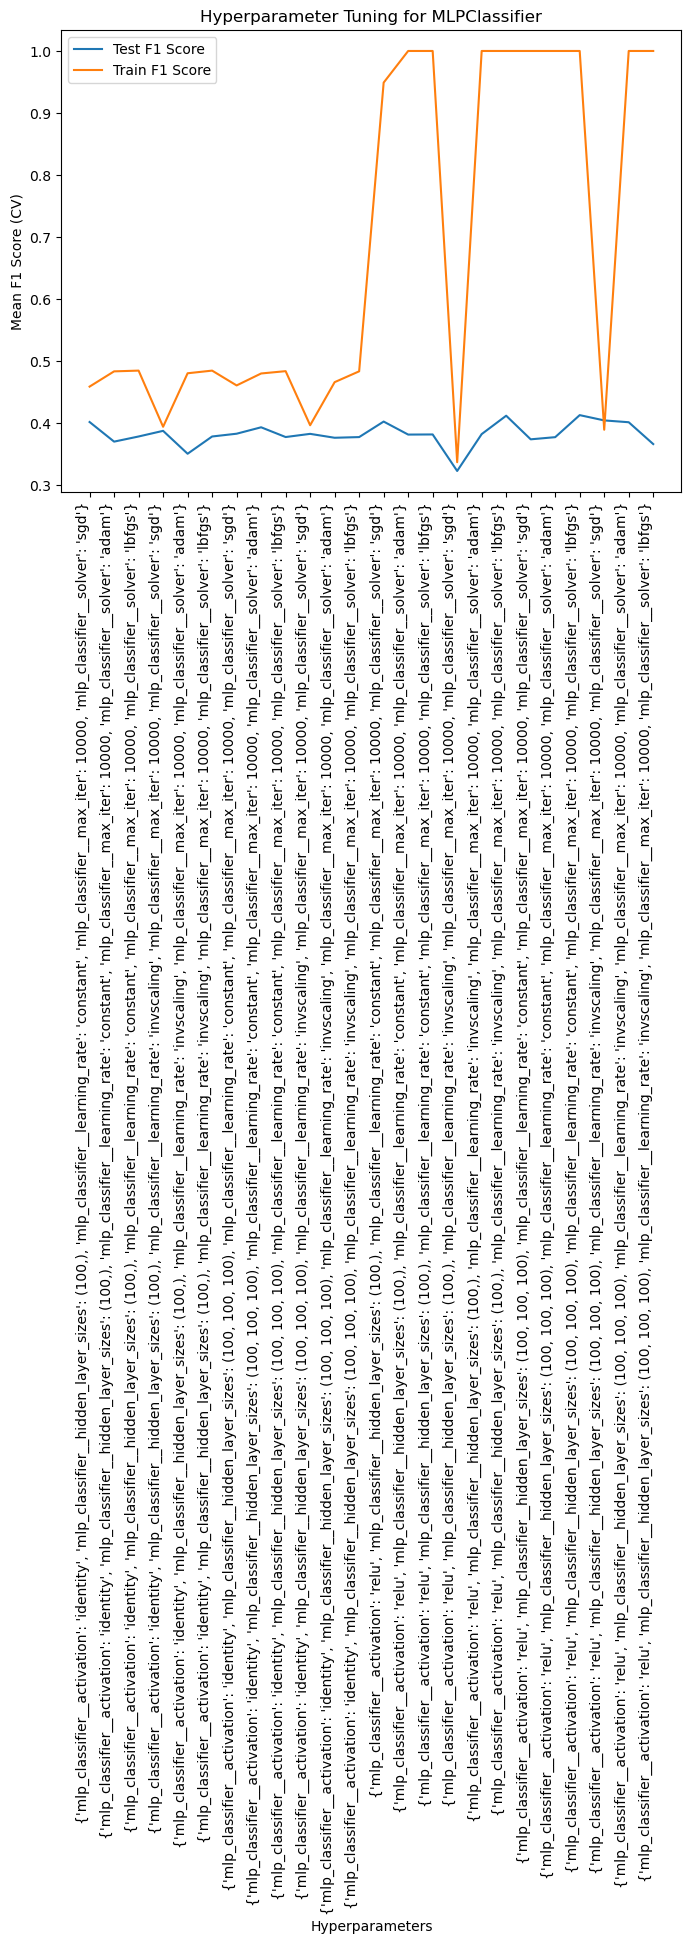

C:\Users\omen\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\omen\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\omen\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\omen\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):

C:\Users\omen\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\omen\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\omen\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\omen\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\omen\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\omen\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):

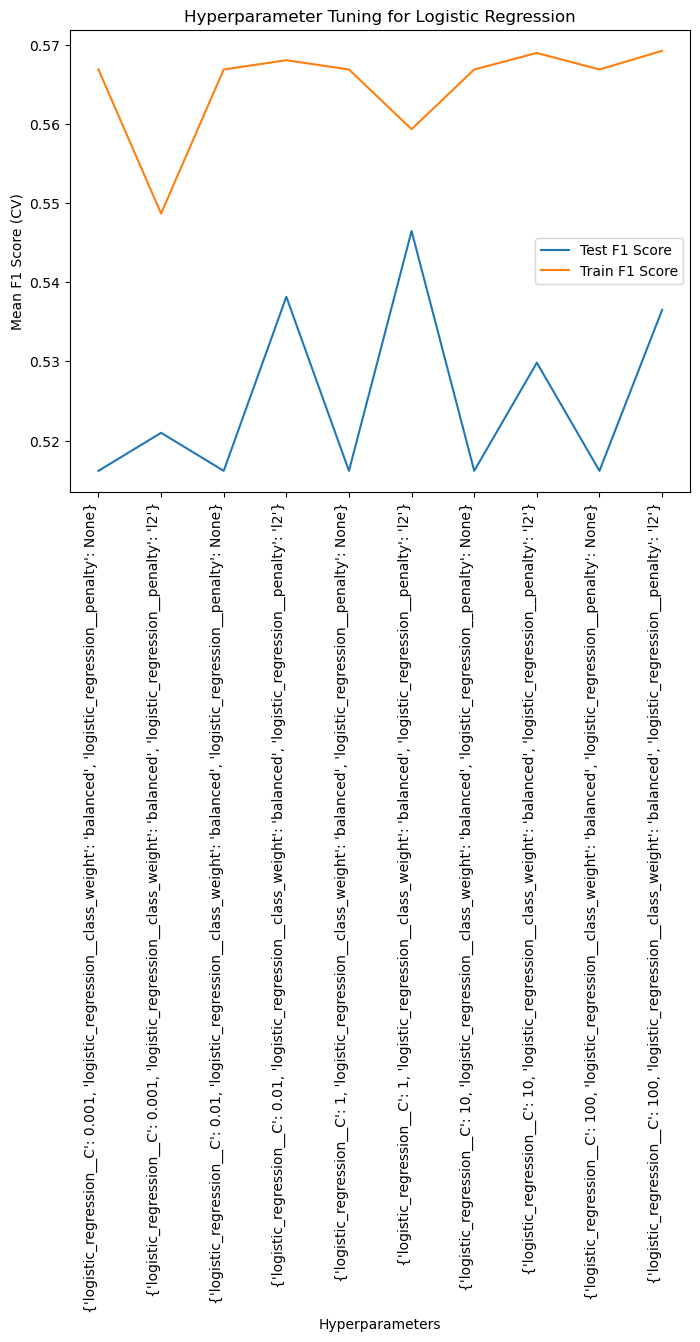

C:\Users\omen\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\omen\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\omen\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\omen\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\omen\anaconda3\Lib\site-packages\sklearn\linear_model\_

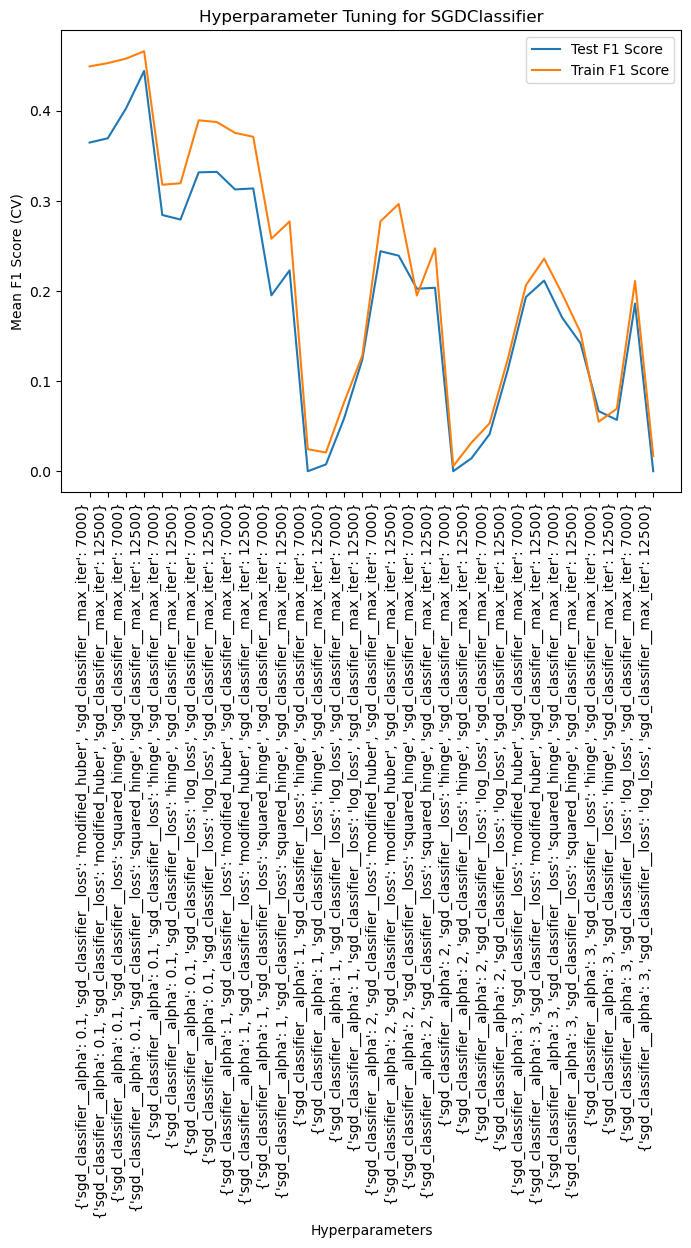

C:\Users\omen\AppData\Local\Temp\ipykernel_10312\3885846421.py:158: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


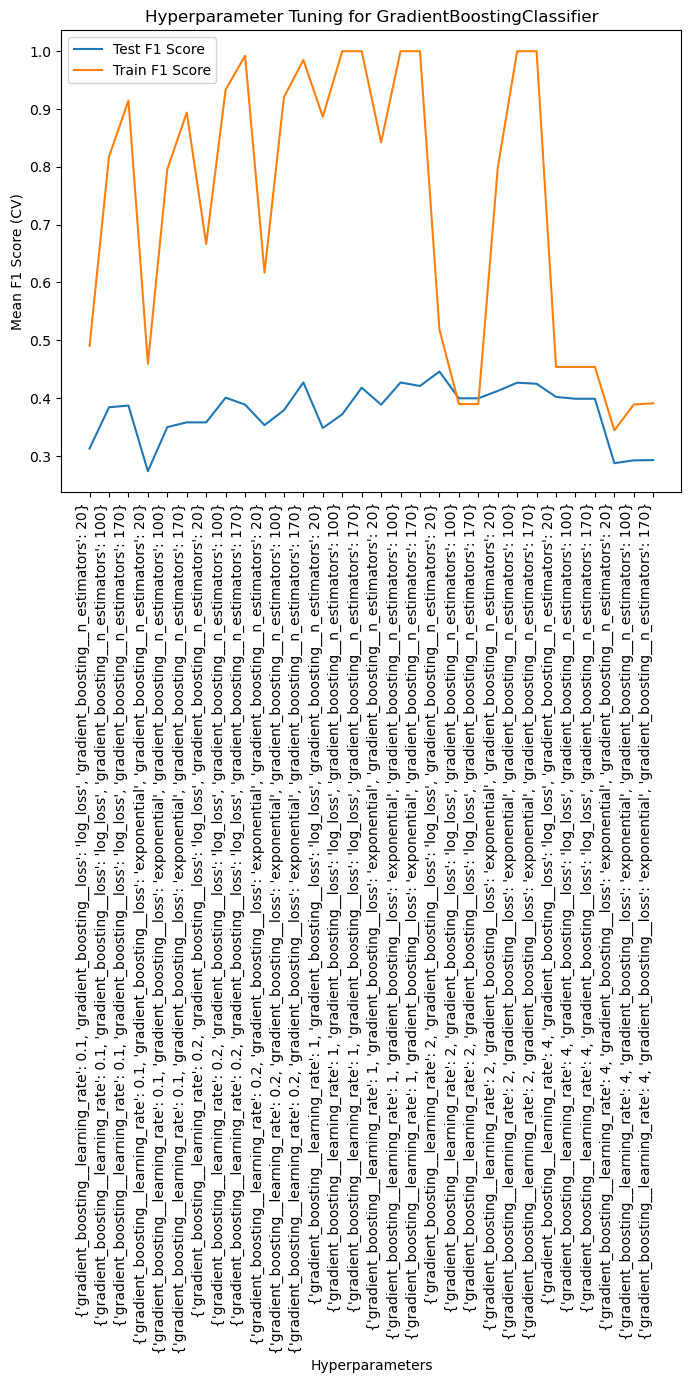

C:\Users\omen\AppData\Local\Temp\ipykernel_10312\3885846421.py:158: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


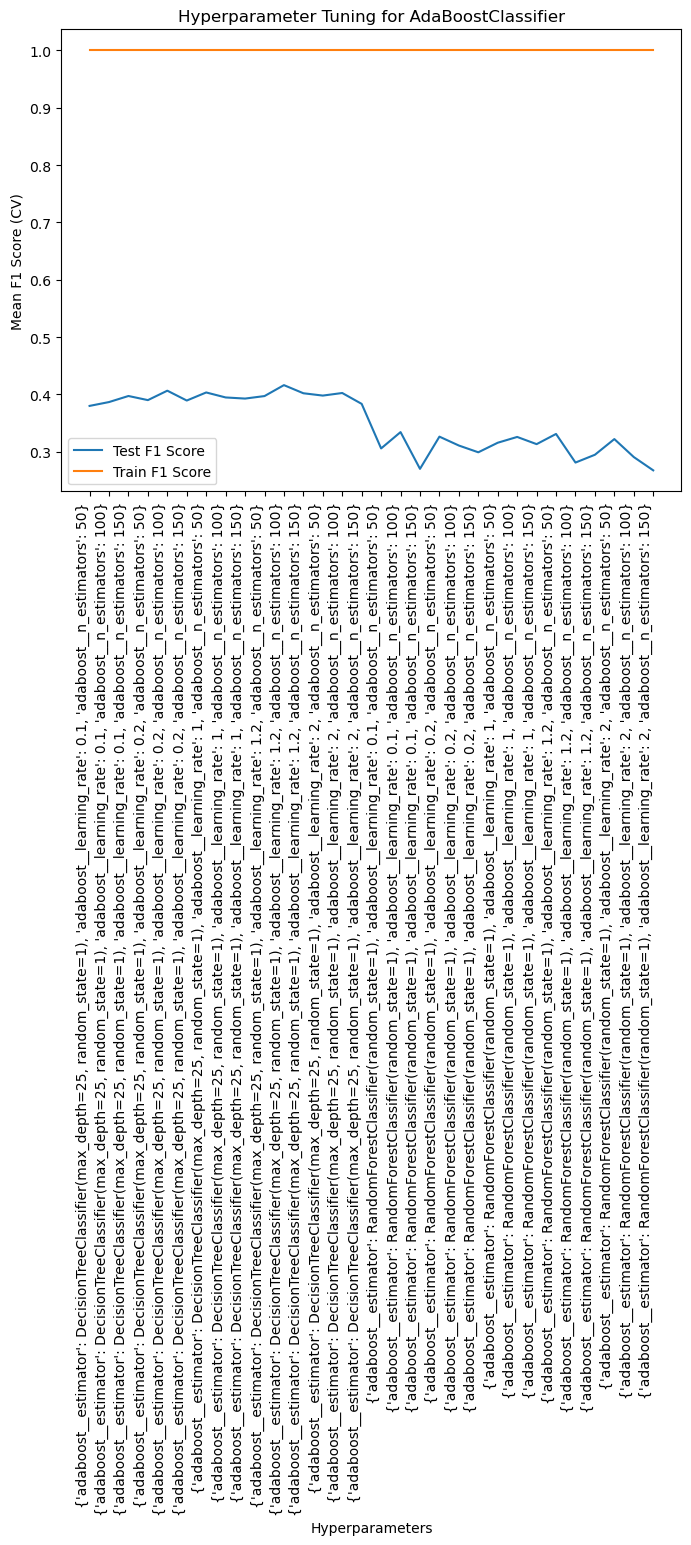

C:\Users\omen\AppData\Local\Temp\ipykernel_10312\3885846421.py:158: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


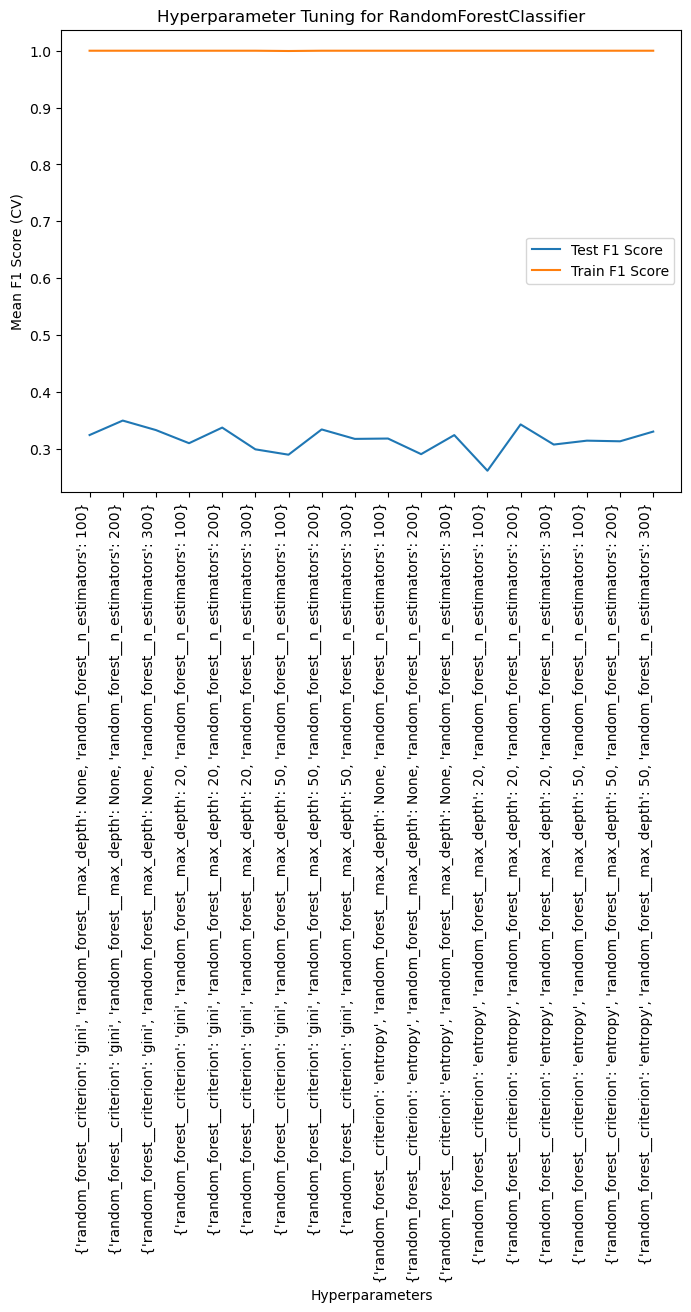

C:\Users\omen\AppData\Local\Temp\ipykernel_10312\3885846421.py:158: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


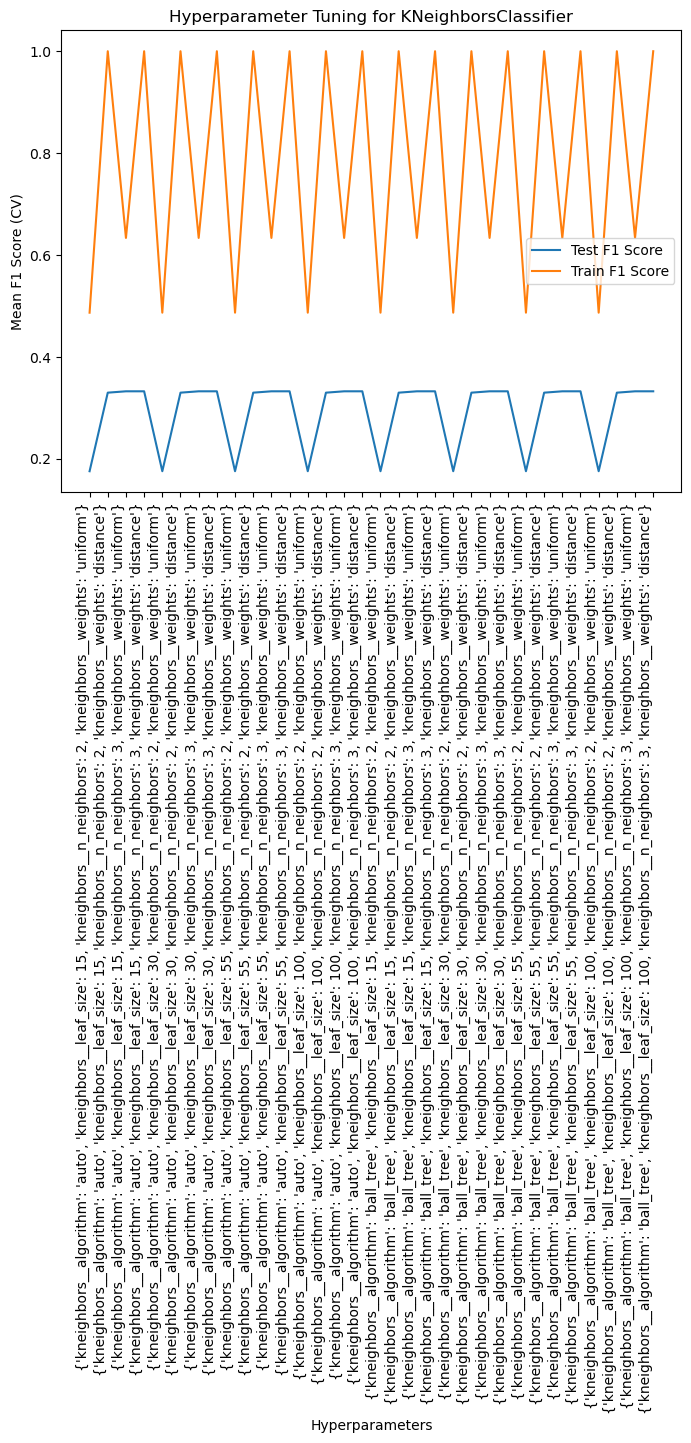

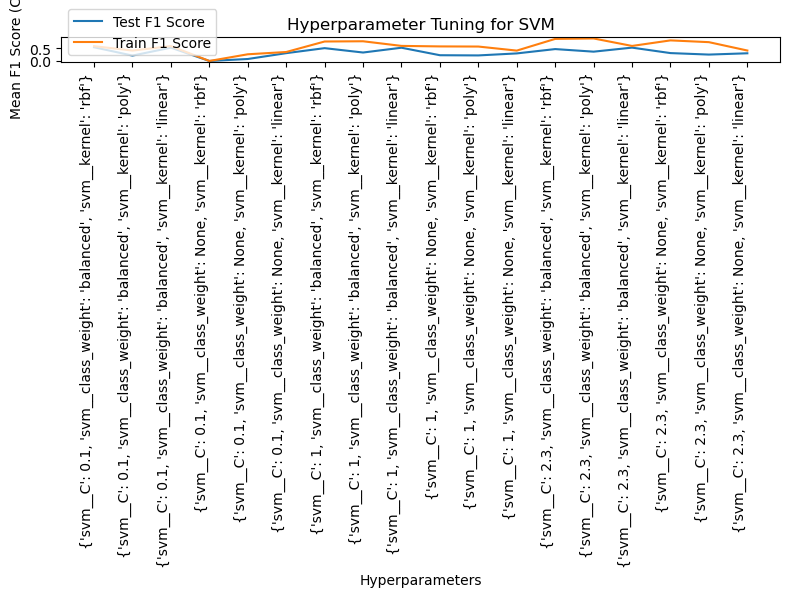

C:\Users\omen\AppData\Local\Temp\ipykernel_10312\3885846421.py:158: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


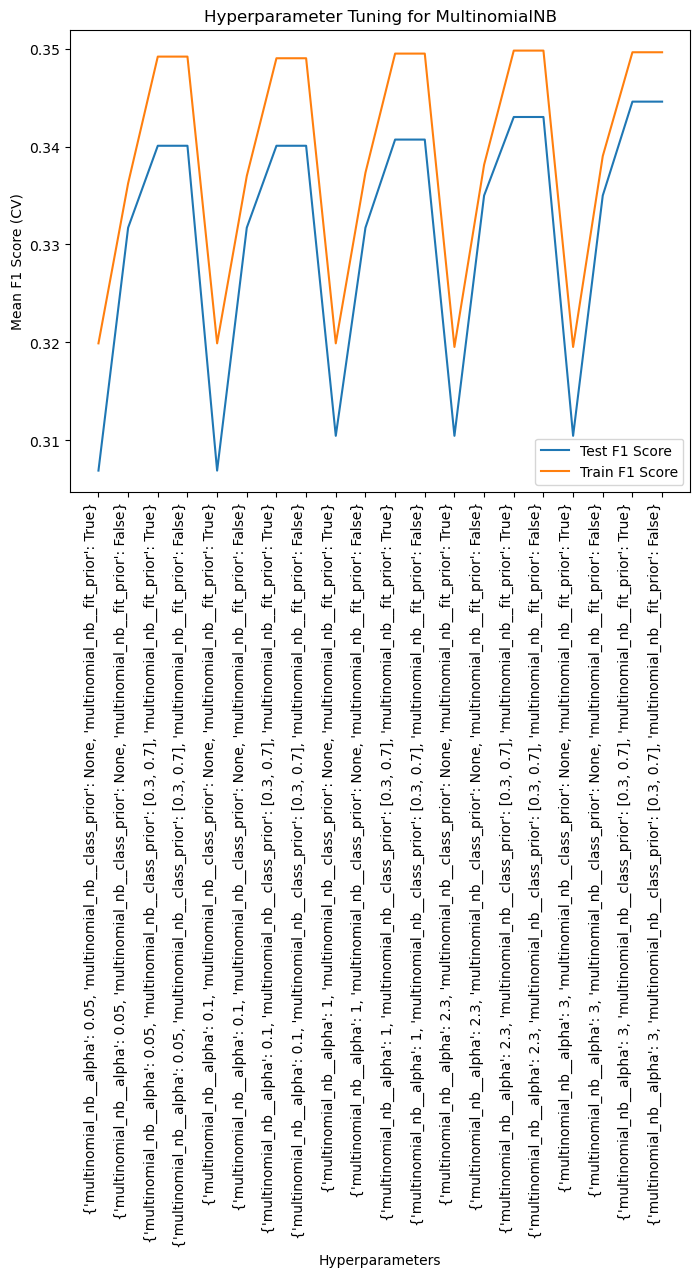

C:\Users\omen\AppData\Local\Temp\ipykernel_10312\3885846421.py:158: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


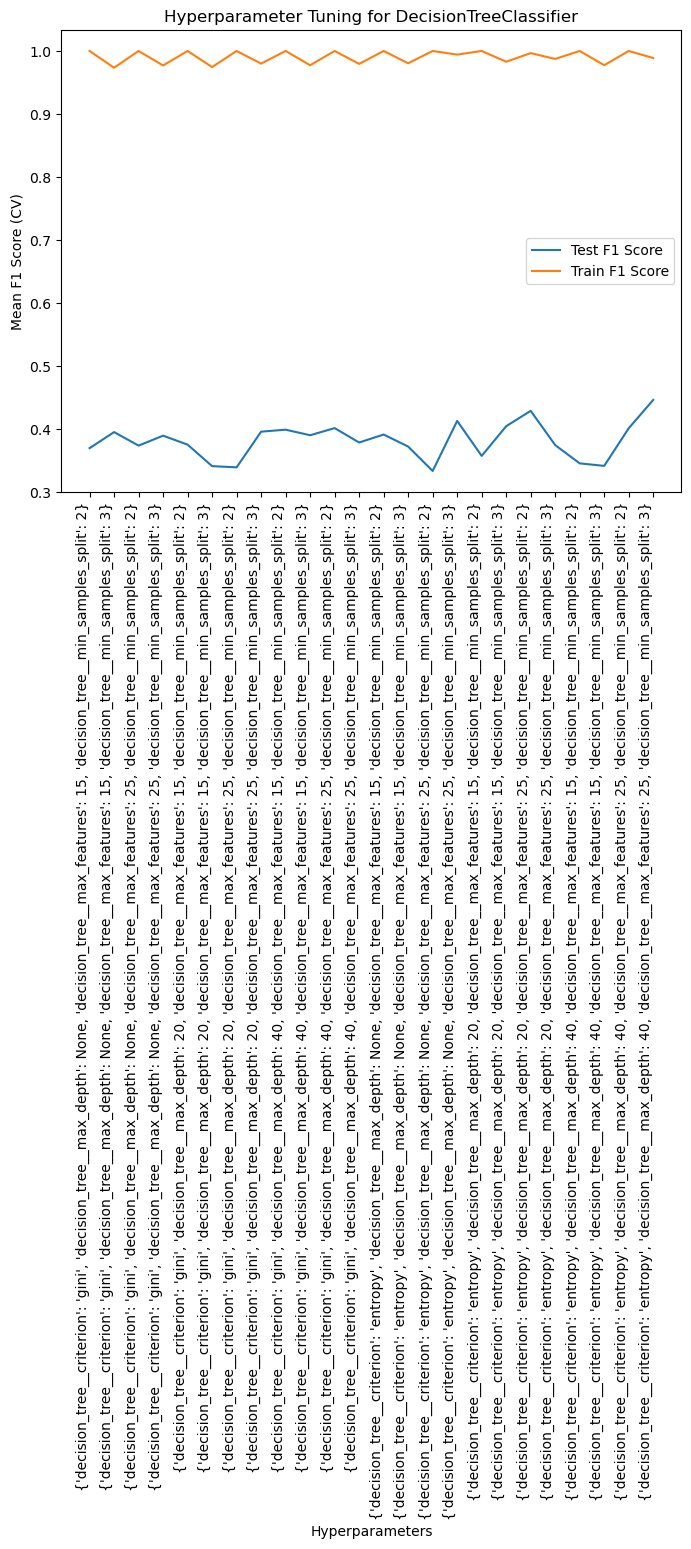

C:\Users\omen\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\omen\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\omen\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\omen\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 420, in fit
    self._final_estimator.fit(Xt

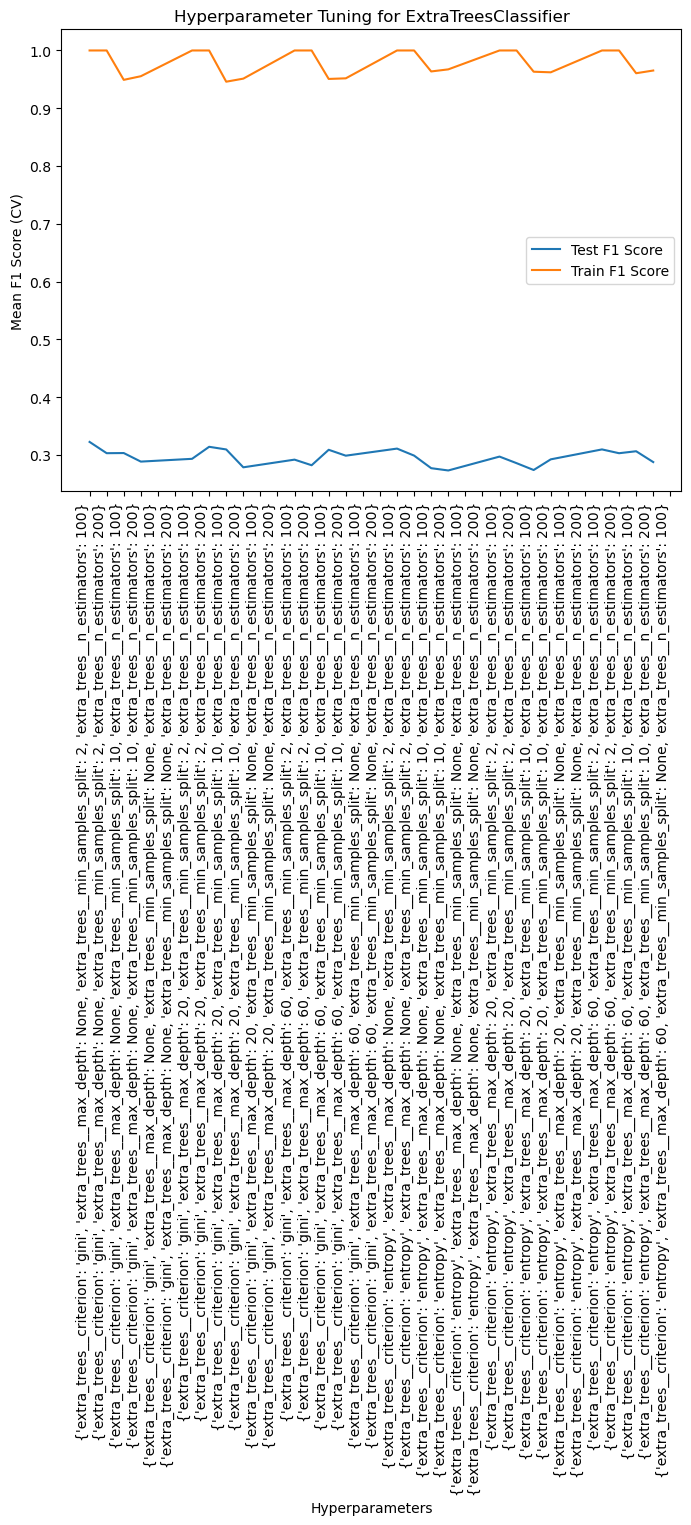

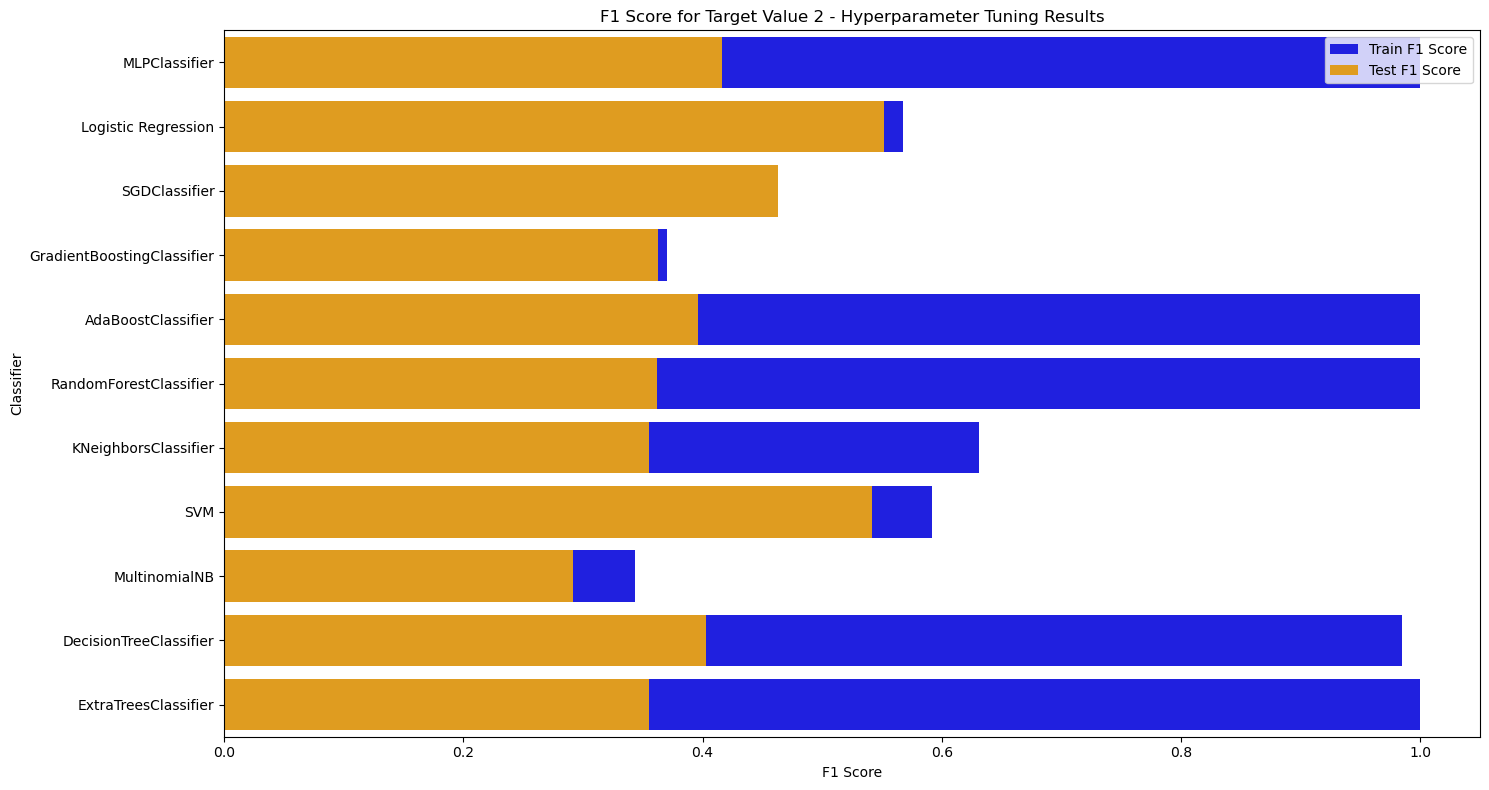

                    Classifier  \
0                MLPClassifier   
1          Logistic Regression   
2                SGDClassifier   
3   GradientBoostingClassifier   
4           AdaBoostClassifier   
5       RandomForestClassifier   
6         KNeighborsClassifier   
7                          SVM   
8                MultinomialNB   
9       DecisionTreeClassifier   
10        ExtraTreesClassifier   

                                      Hyperparameters  Train F1 Score  \
0   {'mlp_classifier__activation': 'relu', 'mlp_cl...        1.000000   
1   {'logistic_regression__C': 1, 'logistic_regres...        0.567164   
2   {'sgd_classifier__alpha': 0.1, 'sgd_classifier...        0.462633   
3   {'gradient_boosting__learning_rate': 2, 'gradi...        0.369898   
4   {'adaboost__estimator': DecisionTreeClassifier...        1.000000   
5   {'random_forest__criterion': 'gini', 'random_f...        1.000000   
6   {'kneighbors__algorithm': 'auto', 'kneighbors_...        0.630872   
7   {'s

In [39]:
results_list = []

# Define the scoring metric (F1 score for target value 2)
f1_scorer = make_scorer(f1_score, pos_label=2)

 ####
classifiers = {
    'MLPClassifier': Pipeline([
        ('scaler', StandardScaler()),
        ('mlp_classifier', MLPClassifier())
    ]),
    'Logistic Regression': Pipeline([
      #  ('scaler', StandardScaler()),
        ('logistic_regression', LogisticRegression())
    ]),
    'SGDClassifier': Pipeline([
      ('scaler', StandardScaler()),
        ('sgd_classifier', SGDClassifier())
    ]),
    'GradientBoostingClassifier': Pipeline([
       # ('scaler', StandardScaler()),
        ('gradient_boosting', GradientBoostingClassifier())
    ]),
    'AdaBoostClassifier': Pipeline([
      #  ('scaler', StandardScaler()),
        ('adaboost', AdaBoostClassifier())
    ]),
    'RandomForestClassifier': Pipeline([
        #('scaler', StandardScaler()),
        ('random_forest', RandomForestClassifier())
    ]),
    'KNeighborsClassifier': Pipeline([
        ('scaler', StandardScaler()),
        ('kneighbors', KNeighborsClassifier())
    ]),
    'SVM': Pipeline([
        ('scaler', StandardScaler()),
        ('svm', svm.SVC(kernel='rbf'))
    ]),
    'MultinomialNB': Pipeline([
        ('multinomial_nb', MultinomialNB())
    ]),
    'DecisionTreeClassifier': Pipeline([
        #('scaler', StandardScaler()),
        ('decision_tree', DecisionTreeClassifier())
    ]),
    'ExtraTreesClassifier': Pipeline([
      #  ('scaler', StandardScaler()),
        ('extra_trees', ExtraTreesClassifier())
    ])
}

# Define the hyperparameter grids for each classifier
hyperparameter_grids = {
    ####
    'MLPClassifier': {
        'mlp_classifier__hidden_layer_sizes': [(100,), (100, 100, 100)],
        'mlp_classifier__max_iter': [10000],
        'mlp_classifier__activation': ["identity", 'relu'],
        'mlp_classifier__solver': [ 'sgd', 'adam', "lbfgs"],
        "mlp_classifier__learning_rate" : ["constant", "invscaling"]
    },#####
    'Logistic Regression': {
        'logistic_regression__C': [0.001, 0.01, 1, 10, 100],
        'logistic_regression__penalty': [None, 'l2'],
        "logistic_regression__class_weight" : ["balanced"]
    },
    ####
    'SGDClassifier': {
        'sgd_classifier__alpha': [ 0.1, 1, 2, 3],
        'sgd_classifier__max_iter': [7000, 12500],    
        'sgd_classifier__loss': ['modified_huber', "squared_hinge", "hinge", "log_loss"]
        
    }, ####
    'GradientBoostingClassifier': {
        "gradient_boosting__loss" : ["log_loss", "exponential"],
        'gradient_boosting__n_estimators': [20,100,170],
        'gradient_boosting__learning_rate': [0.1, 0.2, 1, 2, 4]
    },
    'AdaBoostClassifier': {
        "adaboost__estimator" : [DecisionTreeClassifier(random_state=1, max_depth=25), RandomForestClassifier(n_estimators=100, random_state=1)],
        'adaboost__n_estimators': [50, 100, 150],
        'adaboost__learning_rate': [0.1, 0.2, 1, 1.2, 2]
    },
    'RandomForestClassifier': {
        'random_forest__n_estimators': [100, 200, 300],
        'random_forest__max_depth': [None, 20, 50],
        "random_forest__criterion" : ["gini", "entropy" ]
    },
    'KNeighborsClassifier': {
        'kneighbors__n_neighbors': [2,3,],
        'kneighbors__weights': ['uniform', "distance"],
        "kneighbors__algorithm" : ["auto", "ball_tree",],
        "kneighbors__leaf_size" : [15,30,55,100]
    },
    'SVM': {
        'svm__C': [0.1, 1, 2.3],
        'svm__kernel': ['rbf', "poly", "linear"],
        "svm__class_weight" : ["balanced", None]
    },
    'MultinomialNB': {
        'multinomial_nb__alpha': [0.05, 0.1, 1, 2.3,3],
        'multinomial_nb__fit_prior': [True, False],
        'multinomial_nb__class_prior': [None, [0.3,0.7]]
    },
    'DecisionTreeClassifier': {
        'decision_tree__max_depth': [None, 20, 40],
        'decision_tree__min_samples_split': [2, 3],
        "decision_tree__criterion" :  ["gini", "entropy"],
        "decision_tree__max_features" : [15,25]
    },
    'ExtraTreesClassifier': {
        'extra_trees__n_estimators': [100, 200],
        'extra_trees__max_depth': [None, 20,60],
        "extra_trees__min_samples_split" : [2, 10, None],
        "extra_trees__criterion" : ["gini", "entropy"] 
    }
}


# Create a List to store results
results_list = []

# Loop through classifiers and perform hyperparameter tuning
for name, classifier in classifiers.items():
    # Create GridSearchCV instance for each classifier
    grid_search = GridSearchCV(classifier, hyperparameter_grids[name], cv=5, scoring=f1_scorer, return_train_score=True)

    # Fit GridSearchCV on the training set (X_train and y_train)
    grid_search.fit(X_train_CV, y_train_CV)

    # Retrieve best hyperparameters
    best_params = grid_search.best_params_

    # Evaluate the best model on the training set
    best_model = grid_search.best_estimator_
    y_train_pred = best_model.predict(X_train_CV)

    # Evaluate the best model on the test set
    y_test_pred = best_model.predict(X_test_CV)

    # Store results in the List
    results_list.append({
        'Classifier': name,
        'Hyperparameters': best_params,
        'Train F1 Score': f1_score(y_train_CV, y_train_pred, pos_label=2),
        'Test F1 Score': f1_score(y_test_CV, y_test_pred, pos_label=2)
    })
    
    plt.figure(figsize=(8, 6))
    sns.lineplot(x=[str(params) for params in grid_search.cv_results_['params']], y=grid_search.cv_results_['mean_test_score'], label='Test F1 Score')
    sns.lineplot(x=[str(params) for params in grid_search.cv_results_['params']], y=grid_search.cv_results_['mean_train_score'], label='Train F1 Score')
    plt.title(f'Hyperparameter Tuning for {name}')
    plt.xlabel('Hyperparameters')
    plt.ylabel('Mean F1 Score (CV)')
    plt.xticks(rotation=90, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.show()
    

# Create DataFrame from the list of results
results_df = pd.DataFrame(results_list)
# Visualize the results using bar plots
%matplotlib inline

plt.figure(figsize=(15, 8))

sns.barplot(x='Train F1 Score', y='Classifier', data=results_df, color='blue', label='Train F1 Score')
sns.barplot(x='Test F1 Score', y='Classifier', data=results_df, color='orange', label='Test F1 Score')
plt.title('F1 Score for Target Value 2 - Hyperparameter Tuning Results')
plt.xlabel('F1 Score')
plt.ylabel('Classifier')
plt.legend()
plt.tight_layout()
plt.show()

print(results_df)
    

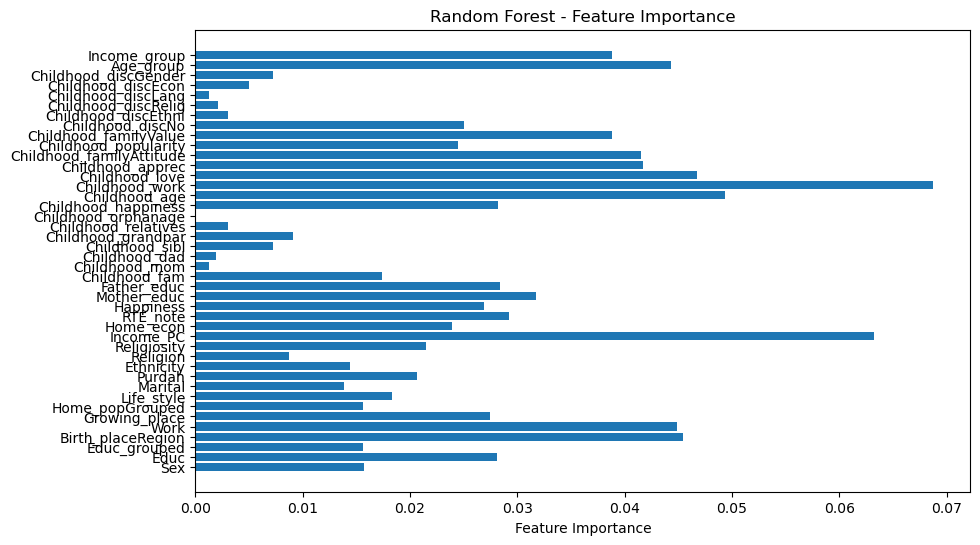

In [40]:
%matplotlib inline

feature_importance = clf_RForest.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importance)
plt.xlabel("Feature Importance")
plt.title("Random Forest - Feature Importance")
plt.show()